In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint



def phase_diagram(system, ss_x, ss_y, xmin=-10, xmax=10, ymin=-10, ymax=10, phase_diagram_resolution=20, arrow_scale=100):
    # Create a grid of points
    x = np.linspace(xmin, xmax, phase_diagram_resolution)
    y = np.linspace(ymin, ymax, phase_diagram_resolution)

    X, Y = np.meshgrid(x, y)

    # Compute the direction at each grid point
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    NI, NJ = X.shape
    for i in range(NI):
        for j in range(NJ):
            x = X[i, j]
            y = Y[i, j]
            dx, dy = system([x, y])
            u[i,j] = dx
            v[i,j] = dy

    # Normalize arrow size for better visualization
    N = np.sqrt(u**2 + v**2)
    u /= N
    v /= N

    # Dim the arrows using the alpha parameter
    plt.quiver(X, Y, u, v, angles='xy', alpha=0.5, scale=arrow_scale)

    # Plot the steady state as a red dot
    # plt.scatter(ss_x, ss_y, color='orangered', s=45)  # s sets the size of the dot

    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.xlabel('$x$')
    plt.ylabel('$y$')

# # trajectories
#     random_u0 = np.random.uniform(xmin,xmax,10)
#     random_v0 = np.random.uniform(ymin,ymax,10)
#     for uv0 in zip(random_u0,random_v0) :
#         tspan = np.linspace(0, 50, 1000)

#         ys = odeint(system, uv0,tspan)
#         plt.plot(ys[:,0], ys[:,1], 'b-', color='darkseagreen') # path
#         plt.plot([ys[0,0]], [ys[0,1]], 'o', color='slategrey') # start
#         # plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

    plt.scatter(ss_x, ss_y, color='orangered', s=45)  # s sets the size of the dot

    plt.show()

## Test with chatgpt

/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_51846/469813651.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(ys[:,0], ys[:,1], 'b-', color='darkseagreen') # path


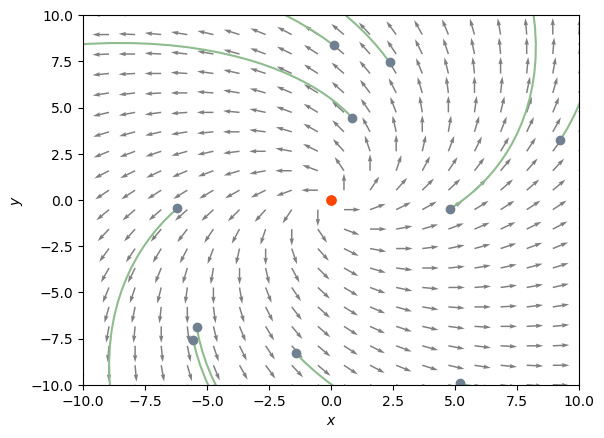

In [11]:
# Define the system
def test_ode(Y, t=0):
    x, y = Y
    dx = x - y
    dy = x + y
    return [dx, dy]

phase_diagram(test_ode, 0,0)



## Test with turinghill multistable 

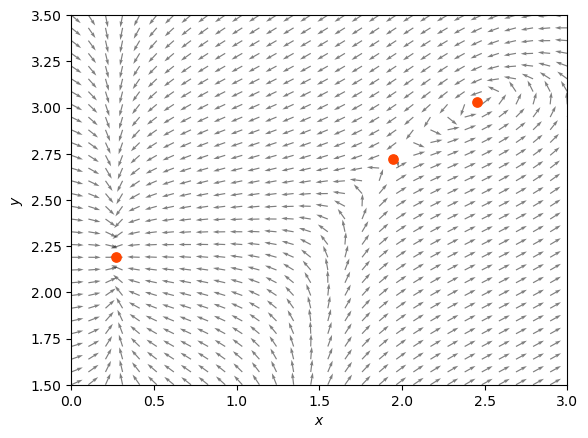

In [22]:
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
from equations.twonode_eq import *

import pickle

df= pickle.load( open(modellingpath + f'/growth/out/analytical/lsa_dataframes/multiinstability_lsa_df_circuitturinghill_variant9_combinedparametersets.pkl', "rb"))
turing_df = df.loc[df['system_class']=='turing I oscillatory']
turing_df_ssn1 = turing_df[turing_df['ss_n']==3]

parID = 5972417
par_dict = df.loc[parID,0].to_dict()

turinghill(par_dict).dudt([1,1])
u_ss,v_ss= [u for u,v in df.loc[parID]['ss_list']], [v for u,v in df.loc[parID]['ss_list']]

phase_diagram(turinghill(par_dict).dudt,u_ss,v_ss,xmin=0,ymin=1.5,xmax=3,ymax=3.5,phase_diagram_resolution=30,arrow_scale=40)

In [51]:
u_ss, v_ssu_ss,v_ss= [u for u,v in df.loc[5972417]['ss_list']], [v for u,v in df.loc[5972417]['ss_list']]


([0.2687, 2.4556, 1.9468], [2.1932, 3.0318, 2.7225])

In [58]:
df.loc[5972417]

,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,n,d_A,d_B,ss_n,ss_list,ss_class,system_class,maxeig,estimated_wvl,complex_dispersion
0,16.990017,21.330769,522.049858,273.485454,2.916407,6.115411,13.882233,1.350454,77.713139,9.772385,2.741781,0.001,1.0,3.0,"[0.2687, 2.1932]",stable point,simple stable,-9.780252+0.000000j,NaN,True
1,16.990017,21.330769,522.049858,273.485454,2.916407,6.115411,13.882233,1.350454,77.713139,9.772385,2.741781,0.001,1.0,3.0,"[2.4556, 3.0318]",stable spiral,turing I oscillatory,4.382309+0.000000j,0.326264,True
2,16.990017,21.330769,522.049858,273.485454,2.916407,6.115411,13.882233,1.350454,77.713139,9.772385,2.741781,0.001,1.0,3.0,"[1.9468, 2.7225]",unstable point,simple unstable,17.167766+0.000000j,0.383877,False
